





# Regression Analysis:

## Use the diabetes data set from UCI and Pima Indians Diabetes data set for performing the following:  

a. Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard Deviation, Skewness and Kurtosis

b. Bivariate analysis: Linear and logistic regression modeling  
c. Multiple Regression analysis  
d. Also compare the results of the above analysis for the two data sets 

Dataset link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database 

In [2]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.shape

(768, 9)

### Part (a): Univariate analysis

In [6]:

univariate_stats = df.describe().T  # T gives us a transposed view

# Calculate additional statistics
univariate_stats['mode'] = df.mode().iloc[0]
univariate_stats['variance'] = df.var()
univariate_stats['skewness'] = df.skew()
univariate_stats['kurtosis'] = df.kurt()

print("Univariate Analysis:")
univariate_stats

Univariate Analysis:


,count,mean,std,min,25%,50%,75%,max,mode,variance,skewness,kurtosis
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00,1.000,11.354056,0.901674,0.159220
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00,99.000,1022.248314,0.173754,0.640780
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00,70.000,374.647271,-1.843608,5.180157
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00,0.000,254.473245,0.109372,-0.520072
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00,0.000,13281.180078,2.272251,7.214260
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10,32.000,62.159984,-0.428982,3.290443
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42,0.254,0.109779,1.919911,5.594954
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00,22.000,138.303046,1.129597,0.643159
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00,0.000,0.227483,0.635017,-1.600930


### Part (B): Bivariate Analysis (Linear and Logistic Regression)

#### Linear Regression Example (Blood Pressure and Diabetes Outcome)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

# Select features for linear regression
x =df[['BloodPressure','Glucose']].values
y =df['Outcome'].values

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
   
print("Linear Regression Coefficient:", linear_model.coef_)
print(f"Linear Regression MSE: {mse_linear}")

Linear Regression Coefficient: [0.00087152 0.00698308]
Linear Regression MSE: 0.18493322653251187


#### Logistic Regression Example (Predicting Diabetes Outcome)

In [19]:
from sklearn.linear_model import LogisticRegression

# Select features for logistic regression
X = df[['Glucose', 'BMI','Pregnancies']].values
Y = df['Outcome'].values

# Split data for logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print("Logistic Regression Coefficients:", logistic_model.coef_)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")

Logistic Regression Coefficients: [[0.03671313 0.09580227 0.11650881]]
Logistic Regression Accuracy: 0.7532467532467533


### Part (c): Multiple Regression Analysis

In [20]:
# Multiple regression using multiple predictors
X_multiple = df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI']]
y_multiple = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.3, random_state=42)

# Train multiple regression model
multiple_reg_model = LinearRegression()
multiple_reg_model.fit(X_train, y_train)
accuracy=accuracy

print("Multiple Regression Coefficients:", multiple_reg_model.coef_)

Multiple Regression Coefficients: [ 0.02031762  0.00614712 -0.00108244  0.01531502]


<Axes: xlabel='BloodPressure', ylabel='count'>

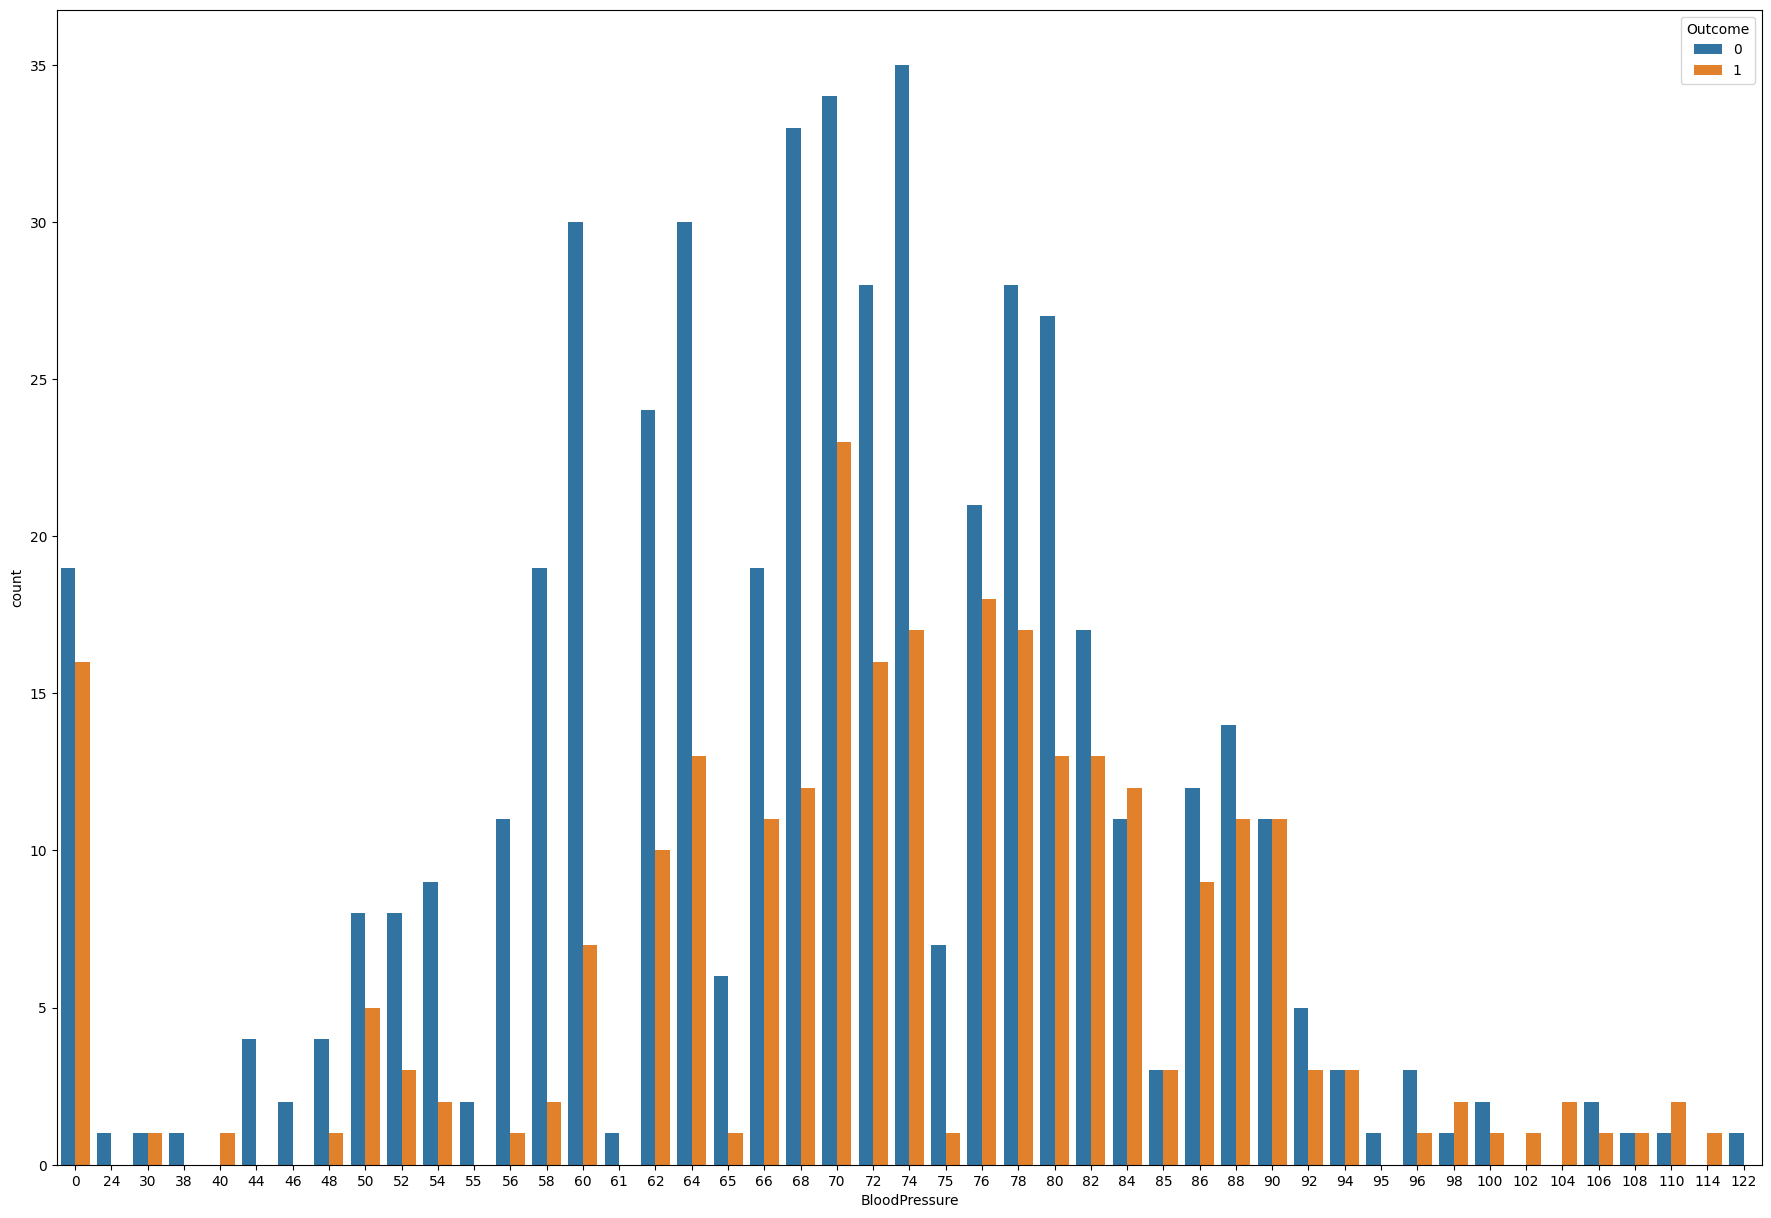

In [23]:
fig, axes = plt.subplots(figsize=(22,15))
sns.countplot(x='BloodPressure', data=df, hue='Outcome',ax=axes)